# Forecasting Future Demand of Power Consumption

Source: http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption# <br>
<br>
The dataset used is a multivariate time series dataset describing electricity consumption of a singular household over four years (2006 - 2010), with observations collected on the minute. My aim is to explore this dataset and then propose several machine learning methods to forecast future demand of power consumption for this particular household. 

We are given the followng description of the dataset: <br>
1.date: Date in format dd/mm/yyyy <br>
2.time: time in format hh:mm:ss<br>
3.global_active_power: household global minute-averaged active power (in kilowatt)<br>
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)<br>
5.voltage: minute-averaged voltage (in volt)<br>
6.global_intensity: household global minute-averaged current intensity (in ampere)<br>
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).<br>
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.<br>
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Our main focus is based on active energy, as reactive energy is defined as unused power in the lines that was used by the household in question, whilst active power is the actual power consumed. We are given 3 different sub meter readings in the house, but these are not the only circuits in the household. These other circuits will be powered by the remainder, which we can calculate by taking the sub meter readings away from the global active power for that specific minute.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

hpc = pd.read_csv('household_power_consumption.txt', delimiter=';', header=0, low_memory=False, parse_dates=[['Date', 'Time']])

In [2]:
hpc

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [3]:
hpc.info()
hpc.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,2075259,4187,533,2838,222,89,82,NaN
top,2009-06-08 17:08:00,?,0.000,?,1.000,0.000,0.000,NaN
freq,1,25979,481561,25979,172785,1880175,1436830,NaN
first,2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2010-12-11 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [4]:
hpc[hpc['Global_active_power'] == '?']

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21 11:23:00,?,?,?,?,?,?,NaN
6840,2006-12-21 11:24:00,?,?,?,?,?,?,NaN
19724,2006-12-30 10:08:00,?,?,?,?,?,?,NaN
19725,2006-12-30 10:09:00,?,?,?,?,?,?,NaN
41832,2007-01-14 18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...
1990185,2010-09-28 19:09:00,?,?,?,?,?,?,NaN
1990186,2010-09-28 19:10:00,?,?,?,?,?,?,NaN
1990187,2010-09-28 19:11:00,?,?,?,?,?,?,NaN
1990188,2010-09-28 19:12:00,?,?,?,?,?,?,NaN


These rows are the same as the Voltage columns containing ? elements. Therefore 25979 columns (1.25%) of rows in the dataset have missing values. This percentage is low enough for us to continue analysis by replacing ? values with the means of their respective columns without much loss of information. 

In [5]:
hpc_clean = hpc.replace('?', np.NaN)

In [6]:
non_dt_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 
    'Sub_metering_2', 'Sub_metering_3'] 
hpc_clean[non_dt_cols] = hpc_clean[non_dt_cols].astype(float)
hpc_clean[non_dt_cols] = hpc_clean[non_dt_cols].fillna(hpc_clean[non_dt_cols].mean())
hpc_clean.describe(include='all')

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
unique,2075259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009-06-08 17:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2010-12-11 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,NaN,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Exploratory Analysis
We now calculate the remainder power used on different circuits in the house and assign it to Sub_metering_4, then create some plots for initial observations. 

In [7]:
hpc_clean['Sub_metering_4'] = hpc_clean['Global_active_power']*(1000/60) - hpc_clean['Sub_metering_1'] - hpc_clean['Sub_metering_2'] - hpc_clean['Sub_metering_3']

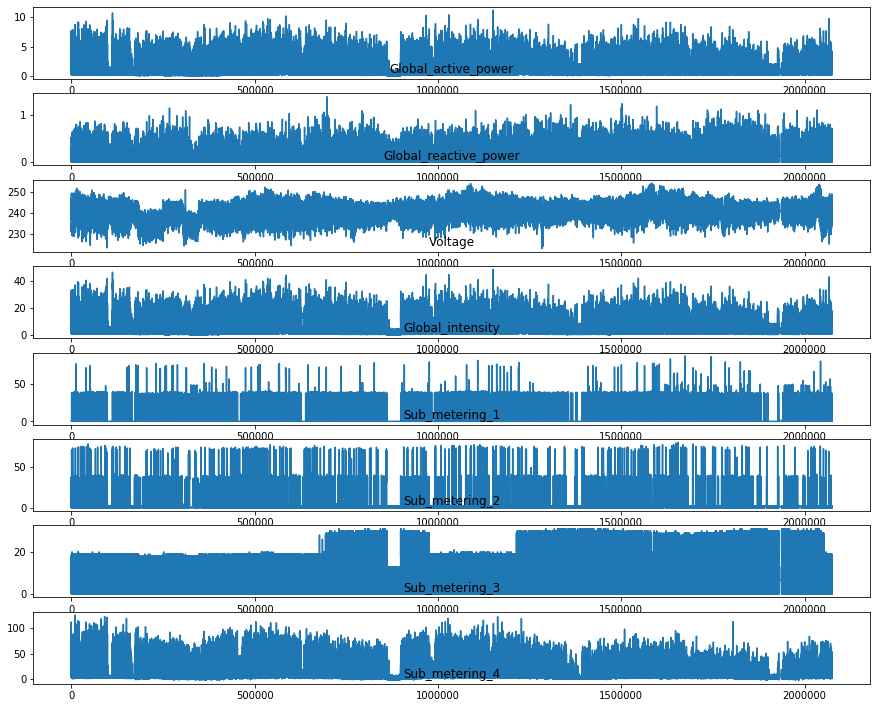

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

names = hpc_clean.columns
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(bottom=-1)
for i in range(1,9):
    ax = fig.add_subplot(8,1,i)
    ax.plot(hpc_clean[names[i]])
    plt.title(names[i],y=0)
    
plt.show()

Initial observations:
- Sub meter 1 appers to be have spikes that could correspond to inrceased usage in the weekends
- Sub meter 2 regular spikes can be attributed to using power consuming utilities periodically such as the tumble dryer.
- Sub meter 3 seems uncanny to observe such constant rises and falls in usage, perhaps this can be attributed to installing new utilities.
- Sub meter 4 has a downward trend especially in the last 2 years and could perhaps be attributed towards sub meter 3 increasing<br>
<br>
We'll zoom into global active power to explore further, firstly by month then by week.

In [9]:
hpc_clean = hpc_clean.set_index(['Date_Time'])

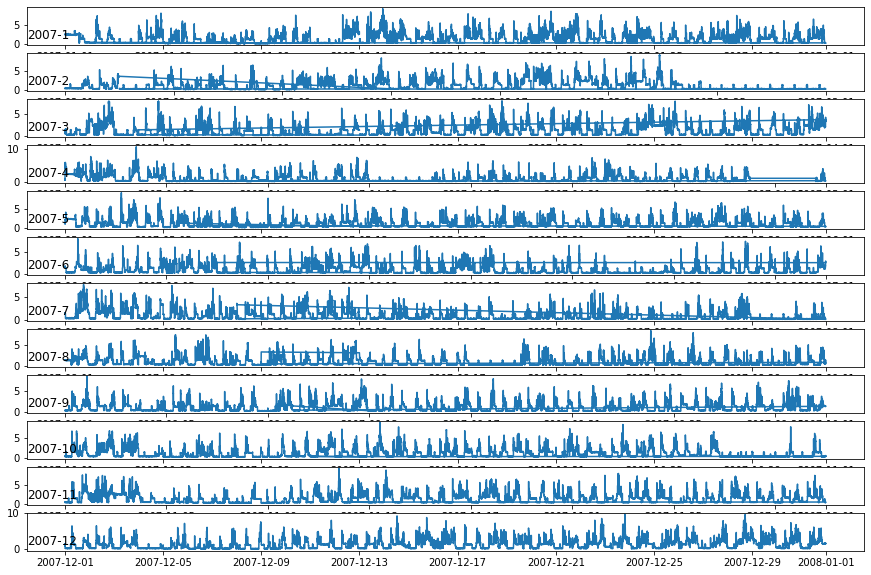

In [10]:
# monthly line plots
int_months = [x for x in range(1,13)]
fig = plt.figure(figsize = (15,10))
for i in range(12):
    ax = fig.add_subplot(12,1,i+1)
    # to access month using datetime object (Date_Time)
    name = '2007-'+ str(int_months[i])
    month = hpc_clean[name]
    plt.plot(month['Global_active_power'])
    plt.title(name, y=0, loc='left')

- There are 'waves' of power usage on most days of the month, which corresponds to some form of routine within the household.<br>
- There are also periods where there is almost no power consumption for periods of up to a week, likely indicating vacation periods. <br>
- There exists periods where power consumption is low - moderate levels, mainly centred between mid april till mid August, indicating seasonal changes in power consumption.

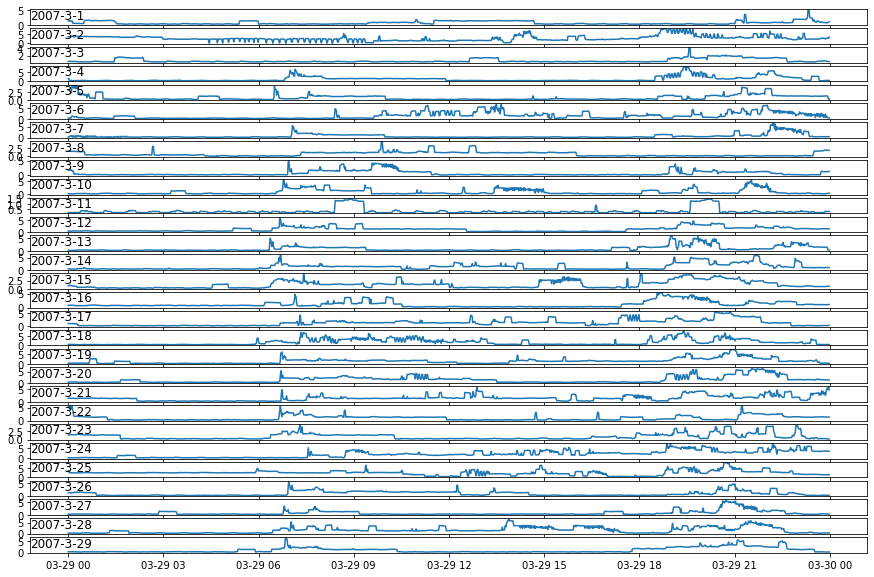

In [11]:
#daily line plots
#Analysing March 2007 dates - change if desired
int_days = [x for x in range(1,30)]
fig = plt.figure(figsize = (15,10))
for i in range(29):
    ax = fig.add_subplot(29,1,i+1)
    # to access day using datetime object (Date_Time). Change date for analyis of other time periods
    name = '2007-3-'+ str(int_days[i])
    month = hpc_clean[name]
    plt.plot(month['Global_active_power'])
    plt.title(name, y=0, loc='left')
plt.show()

We observe the following trends on most days:
- Power consumption usually starts at approximately 6am
- Small drop after initial usage till approximately 6pm
- Large spike indicating more people in the household using power, then a drop when they go to bed
- Power consumption due to weather and seasons affects results significantly
<br>
<br>
We'll plot some distributions to find any relationships.

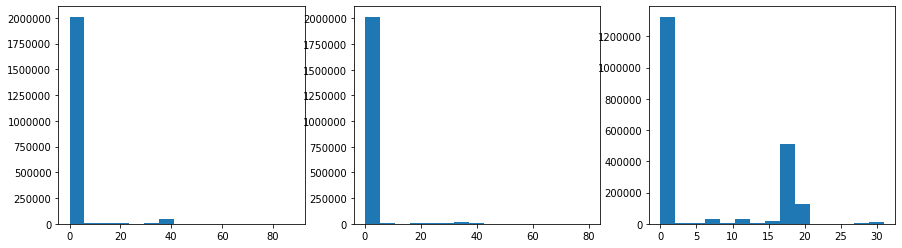

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4)) 
ax1.hist(hpc_clean['Sub_metering_1'], bins=15)
ax2.hist(hpc_clean['Sub_metering_2'], bins=15)
ax3.hist(hpc_clean['Sub_metering_3'], bins=15)
plt.show()

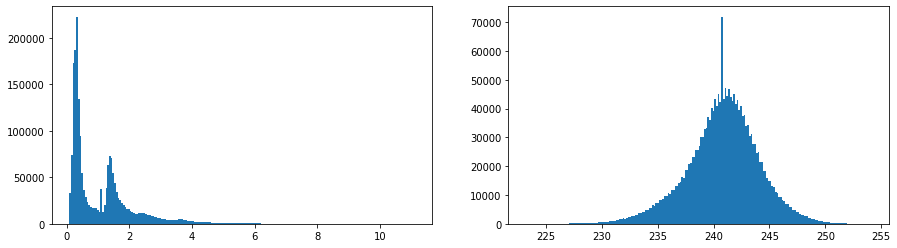

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))  
ax1.hist(hpc_clean['Global_active_power'], bins=200)
ax2.hist(hpc_clean['Voltage'], bins=200)
plt.show()

The histogram for global active power makes sense - a spike near 0 when everyone in the household is asleep and/or away, and the secondary spike is when home appliances are used, usually in a routine fashion e.g. making dinner, using lights at certain periods of the day etc. This opens up a pathway to where we might want to go with predictive modelling with these two clusters usage on an hour by hour basis, as a bi-modal distribution.

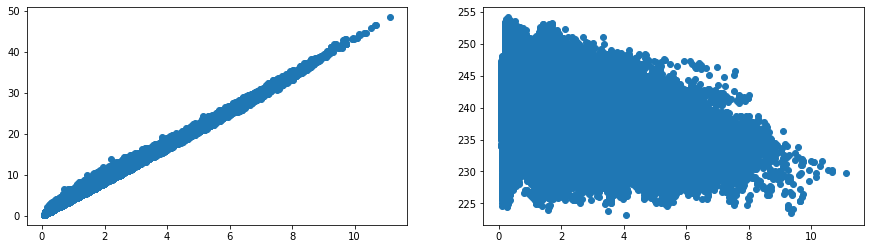

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))  
ax1.scatter(hpc_clean['Global_active_power'], hpc_clean['Global_intensity'])
ax2.scatter(hpc_clean['Global_active_power'], hpc_clean['Voltage'])
plt.show()

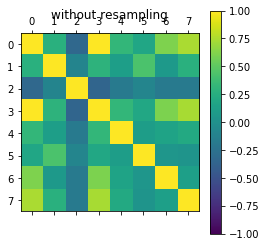

In [15]:
plt.matshow(hpc_clean.corr(method='spearman'),vmax=1,vmin=-1)
plt.title('without resampling')
plt.colorbar()
plt.show()

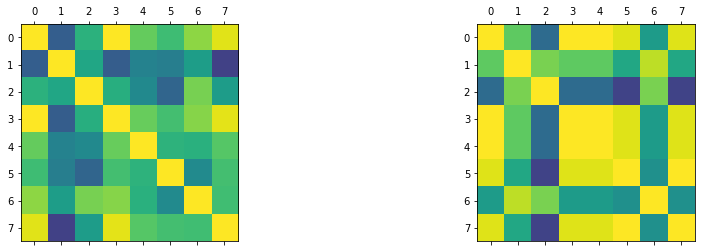

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))  
#Resampled over month
ax1.matshow(hpc_clean.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1)
#Resampled over year
ax2.matshow(hpc_clean.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1)
plt.show()

The above shows that Global_active_power and Global_intensity are correlated, but with voltage less so. The correlations between all features are shown with and without resampling the dataset, resampled over a month and year respectively. It appears that resampling over a year causes significant changes in correlation, which we will take note of.

## Problem Framing & Data Preparation
We want to use this data to forecast the consumption of power for a household within specific time intervals, such as:
- Hourly consumption for the following day
- Daily consumption for the following week
- Daily consumption for the following month
- Monthly consumption for the following year
<br>
<br>
This could be applied to similar datasets to let the user gain a better idea of the subjects' power consumption and make informed decisions and try to reduce excessive expenditure. <br>
In the attempt to better prepare our data for more accurate predictions, we can develop a few features to add that may be useful to us such as: <br><br>
- Likelihood of people being out of the house during certain periods of the day
- Whether there is a public holiday
- Is it a weekend or weekday
- What season it is <br>
<br>
The data can also be reformatted to better fit some of our later models:
<br><br>
- Daily and weekly differencing of data, reducing effects such as weather has on our data
- Normalising the data to work with units of the same scale

## Modelling
We'll delve into several methods to forecast the framework defined above to see what methods are most suitable for us to use. Listed are some routes we can follow:
- Machine learning methods
   - k-nearest neighbours
   - decision trees
   - random forest
- Linear methods
   - linear regression
   - SGDRegressor
   - AutoRegressive Integrated Moving Average (ARIMA) model
- Neural Networks
   - Long Short-Term Memory (LSTM) Network
<br> 
In this project I'll show the application of the LSTM and ARIMA model, which I've found to perform best in their respective categories.

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Evaluation Metric
def evaluate(actual, predicted):
    scores = list()
    #RMSE calculated for each day
    for i in range(actual.shape[1]):
        rmse = np.sqrt(mean_squared_error(actual[:,i],predicted[:,i]))
        scores.append(rmse)
    #Overall RMSE
    score = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            score += (actual[row,col] - predicted[row,col])**2
    score = np.sqrt(score/(actual.shape[0]*actual.shape[1]))
    return score, scores

## LSTM preparation and feature engineering

In [18]:
#Resample data per hour
hpc_lstm = hpc_clean.resample('h').mean()
#Normalise all features 
norm = MinMaxScaler()
hpc_lstm = norm.fit_transform(hpc_lstm)

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

hpc_lstm = series_to_supervised(hpc_lstm, 1, 1)

In [19]:
hpc_lstm.drop(hpc_lstm.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
hpc_lstm.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var7(t),var8(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.813346,0.782676,0.560591
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.560591,0.774169,0.585814
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.585814,0.778809,0.572244
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.572244,0.798917,0.503143
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.503143,0.205723,0.484145


We've resampled the dataset over each hour in order to speed up testing our algorithm in practice. There are still 34589 rows of data which should be enough to run our following algorithm. We normalise and convert the time series into lagged observations appropriate for application in a recurrent neural network. All that's left is to split the data and apply it to our model.

## Model framework
- Apply LSTM with 100 neurons in the first visible layer
- Regularise with a dropout of 25%
- Output layer will consist of 1 neuron for predicting Global_active_power
- Use RMSE to evaluate algorithm

In [20]:
import tensorflow
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
import itertools

# Split dataset so that train has 2 years of data, and then we evaluate it on the following 2 years of data
hpc_lstmv = hpc_lstm.values
train = hpc_lstmv[:365*48,:]
test = hpc_lstmv[365*48:,:]
train_X, train_Y = train[:, :-1], train[:, -1]
test_X, test_Y = test[:, :-1], test[:, -1]
# reshape input [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# We reshaped the input into the format: [samples, timesteps, features].
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape) 

(17520, 1, 9) (17520,) (17056, 1, 9) (17056,)


Epoch 1/25
219/219 - 1s - loss: 0.0148 - val_loss: 0.0071
Epoch 2/25
219/219 - 0s - loss: 0.0090 - val_loss: 0.0056
Epoch 3/25
219/219 - 0s - loss: 0.0086 - val_loss: 0.0055
Epoch 4/25
219/219 - 0s - loss: 0.0085 - val_loss: 0.0055
Epoch 5/25
219/219 - 0s - loss: 0.0085 - val_loss: 0.0055
Epoch 6/25
219/219 - 0s - loss: 0.0084 - val_loss: 0.0056
Epoch 7/25
219/219 - 0s - loss: 0.0084 - val_loss: 0.0056
Epoch 8/25
219/219 - 0s - loss: 0.0083 - val_loss: 0.0056
Epoch 9/25
219/219 - 0s - loss: 0.0083 - val_loss: 0.0057
Epoch 10/25
219/219 - 0s - loss: 0.0083 - val_loss: 0.0055
Epoch 11/25
219/219 - 0s - loss: 0.0083 - val_loss: 0.0056
Epoch 12/25
219/219 - 0s - loss: 0.0082 - val_loss: 0.0057
Epoch 13/25
219/219 - 0s - loss: 0.0083 - val_loss: 0.0056
Epoch 14/25
219/219 - 0s - loss: 0.0083 - val_loss: 0.0055
Epoch 15/25
219/219 - 0s - loss: 0.0082 - val_loss: 0.0056
Epoch 16/25
219/219 - 0s - loss: 0.0082 - val_loss: 0.0056
Epoch 17/25
219/219 - 0s - loss: 0.0082 - val_loss: 0.0056
Epoch 

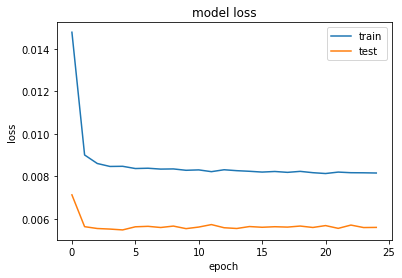

In [21]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#Fit model
fitted = model.fit(train_X, train_Y, epochs=25, batch_size=80, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
#Predictions
YPred = model.predict(test_X)
#Invert scaling
test_X = test_X.reshape((test_X.shape[0], 9))
inv_Y = np.concatenate((YPred, test_X[:, -7:]), axis=1)
inv_Y = norm.inverse_transform(inv_Y)
inv_Y = inv_Y[:,0]
test_Y = test_Y.reshape((len(test_Y), 1))
inv = np.concatenate((test_Y, test_X[:, -7:]), axis=1)
inv = norm.inverse_transform(inv)
inv = inv[:,0]
#RMSE
rmse = np.sqrt(mean_squared_error(inv, inv_Y))
print('RMSE: %.3f' % rmse)

RMSE: 0.482


Adjusting parameters (epochs and batch_size) we can improve the performance of the LSTM Network and achieve lower RSMEs. The RSME is very low, which makes sense as LSTM Networks are brilliant for any time-series related problems. We can also alter dropout and add more CNN layers for further optimization.

## ARIMA preparation and feature engineering
The ARIMA model allows us to easily apply the differencing needed towards balancing trends in our dataset, i.e. seasonal and weekday/weekend effects, and expands on the moving average on intervals defined, for which we'll group the sum of each weeks' Global_active_power.

In [23]:
#Resample data per day
hpc_day = hpc_clean.resample('D').sum()
hpc_day

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Date_Time,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000
...,...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0,9678.900000
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0,4332.300000
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0,14092.200000


## Model framework

ARIMA makes use of the autocorrelation function - a brief explanation of ACF is that it summarises the relationship between a observation and the observation prior to that in a time series. Our aim with ARIMA will be forecasting power consumption for the next week, then make available the actual data once that week has occurred, which will assist in forecasting the subsequent week more accurately. This schema is called walk-forward validation, and is a realistic approach towards using ARIMA in practice.

In [27]:
#Split first 3 years as training set and final year to evaluate on
#Remove several columns to ensure we can reformat into weekly data
hpc_day = hpc_day.values
train = hpc_day[2:-328]
test = hpc_day[-328:-6]
train = np.array(np.split(train, len(train)/7))
test = np.array(np.split(test, len(test)/7))

RMSE: [569.419] 636.98, 553.29, 523.96, 485.24, 570.24, 628.14, 572.76


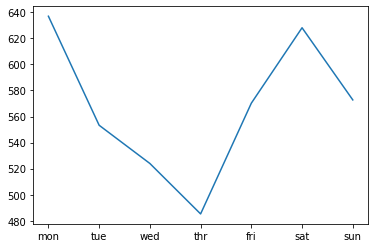

In [28]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA model
def arima(hist):
    #Convert hist to series of total weekly power
    series = np.array([week[:,0] for week in hist]).flatten()
    #Model
    model = ARIMA(series, order=(7,0,0))
    fitted = model.fit()
    return fitted.predict(len(series),len(series)+6)
    
#Evaluate each model
def eval_model(train,test):
    hist = [i for i in train]
    predictions = list()
    for i in range(len(test)):
        y_seq = arima(hist)
        predictions.append(y_seq)
        #get actual observation and add to history for predicting the following week
        hist.append(test[i,:])
    predictions = np.array(predictions)
    return evaluate(test[:,:,0], predictions)
    
score, scores = eval_model(train,test)
s_scores = ', '.join(['%.2f' % s for s in scores])
print('RMSE: [%.3f] %s' % (score, s_scores))
plt.plot(['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun'], scores)
plt.show()

Running ARIMA the overall RMSE is about 569. The line plot shows that ARIMA forecasts power consumption most accurately on thursdays, and least on mondays. We can further tune ARIMA by adjusting it's parameters. We can also improve by applying effects of autoregression based on seasons (SARIMA) and see if normalising and/or standardising like we did in LSTM affects the quality of our ARIMA model.

## Summary

Through exploratory analysis we've identified trends in a households' power consumption and tasked ourselves with forecasting future demand. We've fitted our data to a Long Short-Term Memory Network and an AutoRegressive Integrated Moving Average model, with the latter supervised model delivering significantly better results. Next steps we could take is finely tune our models, prepare data differently e.g. standardising global_active_power as bi-modal and explore any other trends that could be identified and exploited to deliver more accurate results.